In [61]:
import os
import pickle

import autocnet
import pandas as pd

%pylab inline

root = '/scratch/jlaura/ctx_trio'

Populating the interactive namespace from numpy and matplotlib


/home/jlaura/anaconda3/envs/ct/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
adjacency = {'G03_019262_1888_XN_08N203W.cal.cub':['P02_001949_1883_XN_08N203W.cal.cub', 'B19_017205_1888_XN_08N203W.cal.cub'],
             'P02_001949_1883_XN_08N203W.cal.cub':['B19_017205_1888_XN_08N203W.cal.cub', 'G03_019262_1888_XN_08N203W.cal.cub'],
             'B19_017205_1888_XN_08N203W.cal.cub':['P02_001949_1883_XN_08N203W.cal.cub','G03_019262_1888_XN_08N203W.cal.cub']}

In [40]:
# Create a candidate graph from the adjacency above
cg = autocnet.CandidateGraph.from_adjacency(adjacency, basepath=root)

In [91]:
# Load the features onto each node
# These are the raw extracted features that are 'interesting'
# This also loads the cameras that can be used for reprojection
for i, n in cg.nodes(data='data'):
    n.load_features(os.path.join(root, n['image_name'] + '_kps.h5'), format='hdf')
    with open(os.path.join(root, n['image_name'][:-8] + '.camera'), 'rb') as f:
        cam = pickle.load(f)
        n.camera = cam

In [58]:
# Load the matches
# Since these matches can from autocnet_server (and a larger project) we remap the source and destination columns to the
#  node ids in this project.
for s, d, e in cg.edges(data='data'):
    source_key = e.source['image_name'][:3]
    destin_key = e.destination['image_name'][:3]
    matches = pd.read_csv(os.path.join(root, '{}_{}_matches.csv'.format(source_key, destin_key)))
    matches['source'] = s
    matches['destination'] = d
    e.matches = matches

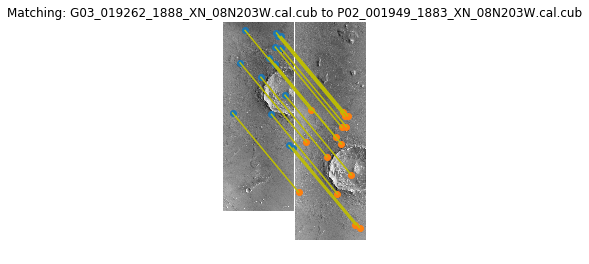

In [59]:
cg.edges[0,1]['data'].plot()

In [60]:
cg.compute_fundamental_matrices()

/home/jlaura/autocnet/autocnet/transformation/fundamental_matrix.py:341: UserWarning: Unable to apply MLE.  Not enough correspondences.  Returning with a RANSAC computed F matrix.
  warnings.warn("Unable to apply MLE.  Not enough correspondences.  Returning with a RANSAC computed F matrix.")
/home/jlaura/autocnet/autocnet/transformation/fundamental_matrix.py:314: UserWarning: F computation fell back to 7-point algorithm, not setting F.
  warnings.warn('F computation fell back to 7-point algorithm, not setting F.')
